# STOCK PRICE PREDICTION Machine Learning Project

In [1]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) 
# to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
import math
import numpy as np
import pandas as pd
from pandas.util.testing import assert_frame_equal
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

C:\Users\Satyam Kukreja\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [3]:
#Get the stock quote 
df = pd.read_csv('Stock_Prediction.csv') 
#Show the data 
print(df)

            Date        Open        High         Low       Close   Adj Close  \
0     2012-01-03   58.485714   58.928570   58.428570   58.747143   50.857235   
1     2012-01-04   58.571430   59.240002   58.468571   59.062859   51.130558   
2     2012-01-05   59.278572   59.792858   58.952858   59.718571   51.698215   
3     2012-01-06   59.967144   60.392857   59.888573   60.342857   52.238651   
4     2012-01-09   60.785713   61.107143   60.192856   60.247143   52.155792   
...          ...         ...         ...         ...         ...         ...   
2132  2020-06-24  365.000000  368.790009  358.519989  360.059998  360.059998   
2133  2020-06-25  360.700012  365.000000  357.570007  364.839996  364.839996   
2134  2020-06-26  364.410004  365.320007  353.019989  353.630005  353.630005   
2135  2020-06-29  353.250000  362.170013  351.279999  361.779999  361.779999   
2136  2020-06-30  360.079987  365.980011  360.000000  364.799988  364.799988   

        Volume  
0     75555200  
1    

In [4]:
df.shape

(2137, 7)

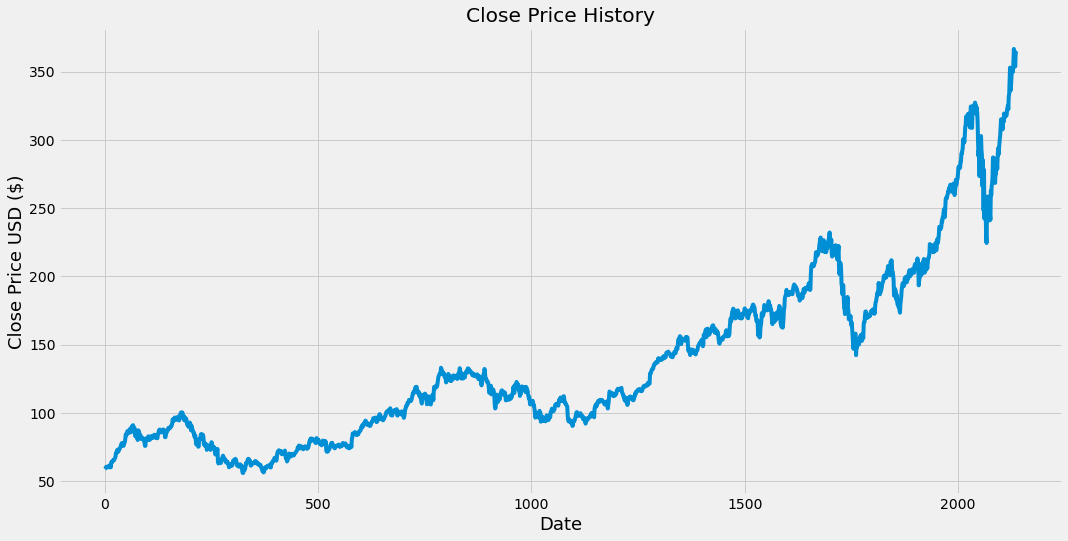

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()
#Graph showing the closing stock price history of Apple Inc

In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
print(data)
#Converting the dataframe to a numpy array
dataset = data.values
print("\nLength of Dataset : ",len(dataset))
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
print("Length of Training data : ",training_data_len)

           Close
0      58.747143
1      59.062859
2      59.718571
3      60.342857
4      60.247143
...          ...
2132  360.059998
2133  364.839996
2134  353.630005
2135  361.779999
2136  364.799988

[2137 rows x 1 columns]

Length of Dataset :  2137
Length of Training data :  1710


In [7]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
print(" Scaled Data :",scaled_data)

 Scaled Data : [[0.00951645]
 [0.01053246]
 [0.01264263]
 ...
 [0.95848621]
 [0.98471391]
 [0.99443261]]


In [8]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
print(train_data)
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
print(x_train)
print(y_train)

[[0.00951645]
 [0.01053246]
 [0.01264263]
 ...
 [0.51995238]
 [0.53536717]
 [0.5322778 ]]
[array([0.00951645, 0.01053246, 0.01264263, 0.01465166, 0.01434364,
       0.01503783, 0.01472062, 0.01418732, 0.01346095, 0.01570904,
       0.01773646, 0.01711122, 0.01368622, 0.01695491, 0.01373679,
       0.02580476, 0.0248715 , 0.0260898 , 0.02872406, 0.03031932,
       0.030186  , 0.02969409, 0.03179047, 0.03376271, 0.03599702,
       0.03960592, 0.0471869 , 0.04730183, 0.05152218, 0.05467593,
       0.04925568, 0.05134288, 0.0513015 , 0.0571539 , 0.05632177,
       0.05786187, 0.06062945, 0.06216957, 0.06660598, 0.06983791,
       0.07077114, 0.07109756, 0.06557159, 0.06423835, 0.06443605,
       0.069631  , 0.07109298, 0.07423293, 0.08163462, 0.09150967,
       0.08966154, 0.08966613, 0.09680578, 0.09904007, 0.0974494 ,
       0.09599666, 0.09448414, 0.099509  , 0.102957  , 0.10440056]), array([0.01053246, 0.01264263, 0.01465166, 0.01434364, 0.01503783,
       0.01472062, 0.01418732, 0.013

In [9]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train)

[[[0.00951645]
  [0.01053246]
  [0.01264263]
  ...
  [0.099509  ]
  [0.102957  ]
  [0.10440056]]

 [[0.01053246]
  [0.01264263]
  [0.01465166]
  ...
  [0.102957  ]
  [0.10440056]
  [0.10083303]]

 [[0.01264263]
  [0.01465166]
  [0.01434364]
  ...
  [0.10440056]
  [0.10083303]
  [0.0960932 ]]

 ...

 [[0.43653859]
  [0.43708567]
  [0.44155886]
  ...
  [0.51673425]
  [0.51058762]
  [0.53523847]]

 [[0.43708567]
  [0.44155886]
  [0.44741587]
  ...
  [0.51058762]
  [0.53523847]
  [0.51995238]]

 [[0.44155886]
  [0.44741587]
  [0.44545281]
  ...
  [0.53523847]
  [0.51995238]
  [0.53536717]]]


In [11]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1650/1650 [==============================] - 39s 23ms/step - loss: 5.8292e-04


In [14]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
print(test_data)
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns \
#                                             (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
print(x_test)
print(y_test)

[[0.44741587]
 [0.44545281]
 [0.43505823]
 [0.43161487]
 [0.43283772]
 [0.46891292]
 [0.48786767]
 [0.48979856]
 [0.49327414]
 [0.4869666 ]
 [0.48741713]
 [0.49266269]
 [0.4883182 ]
 [0.49263048]
 [0.49546244]
 [0.49703934]
 [0.50695117]
 [0.52066037]
 [0.51383796]
 [0.5124863 ]
 [0.51251851]
 [0.5139345 ]
 [0.51609064]
 [0.52181889]
 [0.52748277]
 [0.53803822]
 [0.54463538]
 [0.55300253]
 [0.55535174]
 [0.55055672]
 [0.53842443]
 [0.53263179]
 [0.52307396]
 [0.54083802]
 [0.53189164]
 [0.54907641]
 [0.54080581]
 [0.52162581]
 [0.52278434]
 [0.52320266]
 [0.52854476]
 [0.52091782]
 [0.53099052]
 [0.53549592]
 [0.52979983]
 [0.54437793]
 [0.54692027]
 [0.55181179]
 [0.55831241]
 [0.56729101]
 [0.55416105]
 [0.54225395]
 [0.54058056]
 [0.55055672]
 [0.51673425]
 [0.51058762]
 [0.53523847]
 [0.51995238]
 [0.53536717]
 [0.5322778 ]
 [0.5156401 ]
 [0.52622771]
 [0.53053998]
 [0.53723369]
 [0.51264722]
 [0.52780461]
 [0.51654117]
 [0.50347559]
 [0.5068868 ]
 [0.52477956]
 [0.53559246]
 [0.48

In [15]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [17]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [18]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

10.052039968097414

C:\Users\Satyam Kukreja\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


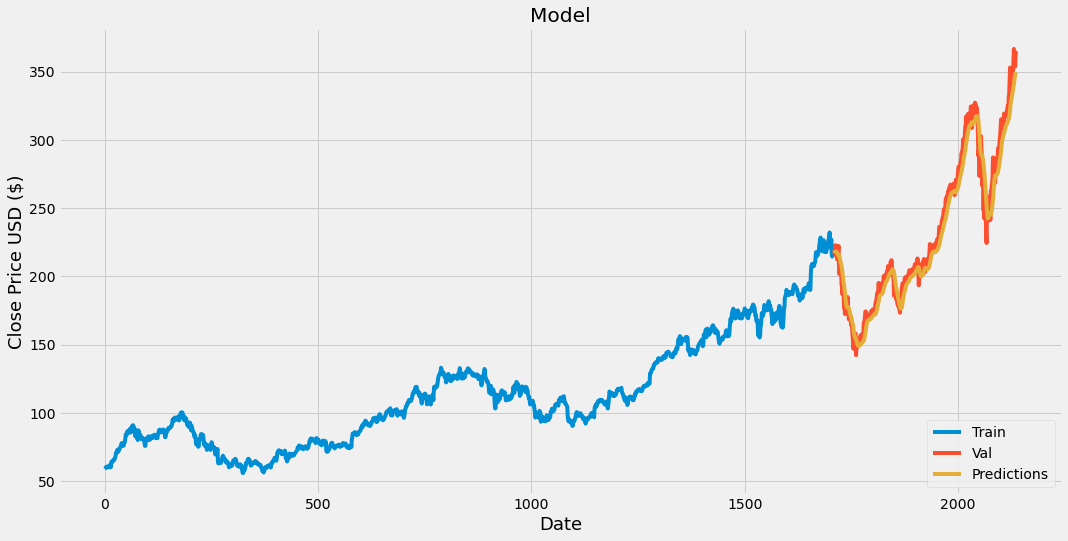

In [19]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
1710,216.020004,219.096176
1711,219.309998,218.461746
1712,220.649994,218.042908
1713,222.729996,217.888184
1714,215.089996,218.086044
...,...,...
2132,360.059998,343.385773
2133,364.839996,345.508972
2134,353.630005,347.655365
2135,361.779999,348.461914


In [21]:
#Get the quote
apple_quote = pd.read_csv('Stock_Prediction.csv')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[350.4764]]


In [22]:
#Get the quote
apple_quote2 = pd.read_csv('Stock_Prediction.csv')
print(apple_quote2['Close'])

0        58.747143
1        59.062859
2        59.718571
3        60.342857
4        60.247143
           ...    
2132    360.059998
2133    364.839996
2134    353.630005
2135    361.779999
2136    364.799988
Name: Close, Length: 2137, dtype: float64
